   #  Web Scraping Using Python (Beautiful Soup)

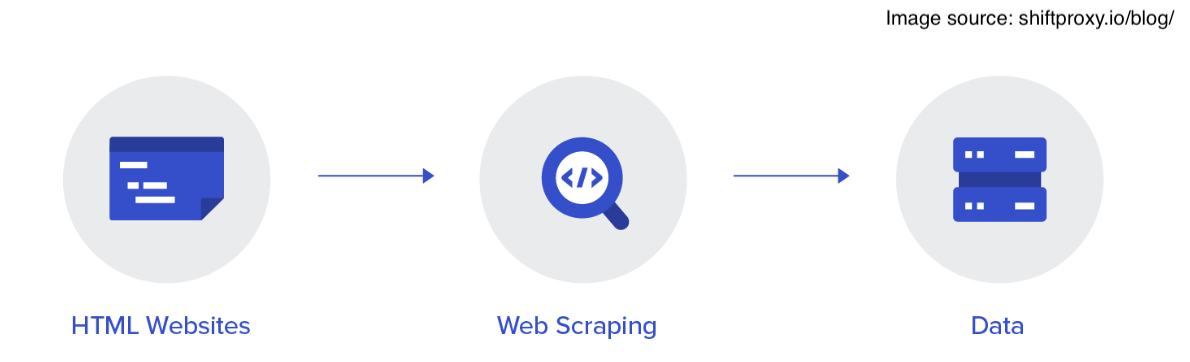

### Introduction:
In this project we will go through data extraction from web using python, With the extrated data we will perform data manipulation and cleaning techniques using padas library.  
The data we are going to use is from 2022 Hero Up 5K Run which took place in Cook Park, Tigard, OR

### Goal:

Analyzing Gender-based Performance Disparities in a 5K Race: A Data-driven Approach 
and to perform Web Scraping, Data Cleaning and Manipulation,  Data Analysis, Data Visualization Statistical Analysis.

###  Table of Content

1. [Importing necessary modules](#1.-Importing-necessary-modules)
2. [Fetching the HTML content from the webpage](#2.-Fetching-the-HTML-content-from-the-webpage)
3. [Extracting data from the HTML](#3.-Extracting-data-from-the-HTML)
4. [Data Manipulation and Cleaning](#4.-Data-Manipulation-and-Cleaning)
5. [Data Analysis and Visualization](#5.-Data-Analysis-and-Visualization)
6. [Save DataFrame to an Excel file](#6.-Save-DataFrame-to-an-Excel-file)
7. [Conclusion](#7.-Conclusion:)

## 1. Importing necessary modules 

In [3]:
## 1. Importing necessary modules 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

### Explanation:

- **pandas:** Library for data manipulation and analysis.
- **numpy:** Fundamental package for scientific computing with Python.
- **matplotlib.pyplot:** Plotting library for creating static, animated, and interactive visualizations in Python.
- **seaborn:** Statistical data visualization library based on Matplotlib.
- **urlopen:** Function to open URLs.
- **BeautifulSoup:** Library for pulling data out of HTML and XML files.

## 2. Fetching the HTML content from the webpage

In [5]:
url = "https://www.hubertiming.com/results/2022HeroUp"
html = urlopen(url)

In [6]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

#### Explanation:

- **url:** URL of the webpage containing the race results.
- **html = urlopen(url):** Opens the URL and fetches the HTML content.
- **BeautifulSoup(html, 'lxml'):** Parses the HTML content using the lxml parser and creates a BeautifulSoup object (soup) which represents the document as a nested data structure.

In [7]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2022 Hero Up!</title>


In [8]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [9]:
soup.find_all('a')

[<a href="https://hero-up.org/" target="_blank">Hero Up Half Marathon</a>,
 <a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2022HeroUpVirtual" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> Virtual 5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2022HeroUp" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a class="btn btn-primary btn-lg" href="/results/feed/2022HeroUp" role="button" style="margin: 0px 0px 5px 5px"> <i class="fa fa-rss"></i> Live Feed</a>,
 <a class="btn btn-primary btn-lg" href="/results/gallery/2022HeroUp" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-camera"></i> Virtual Gallery</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2022HeroUp" href="#tabs-1" id="rootTab" style="font-size: 18px">5K Resu

In [10]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

https://hero-up.org/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2022HeroUpVirtual
/results/summary/2022HeroUp
/results/feed/2022HeroUp
/results/gallery/2022HeroUp
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


## 3. Extracting data from the HTML

In [11]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>5K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>163</td>
</tr>, <tr>
<td>Male:</td>
<td>85</td>
</tr>, <tr>
<td>Female:</td>
<td>78</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Division</th>
<th>Division Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>, <tr data-bib="1">
<td>1</td>
<td>1</td>
<td>

                    TATE WOODWARD

                </td>
<td>M</td>
<td>17</td>
<td>PORTLAND</td>
<td>OR</td>
<td>19:18</td>
<td>6:13</td>
<td>

                    1 of 85

                </td>
<td>M Overall</td>
<td>

                    1 of 1

                </td>
<td>0:03</td>
<td>19:21</td>
</tr>, <tr data-bib="5">
<td>2</td>
<td>5</td>
<td>

                    JAROD SAMUELSON

                </td>
<td>M</td>
<td>45</td>
<td>BEAVERTON</td>
<td>OR</td>
<td>19:20</td>
<td>6:14</td>
<td>

                    2 of 85

#### Explanation:

soup.find_all('tr'): Finds all the <tr> tags (table rows) in the HTML content and returns a ResultSet containing all the matches.

In [12]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>163</td>, <td>181</td>, <td>

                    WILLIAM FEDORCZYK

                </td>, <td>M</td>, <td>5</td>, <td>SHERWOOD</td>, <td>OR</td>, <td>1:10:57</td>, <td>22:53</td>, <td>

                    85 of 85

                </td>, <td>M Under 15</td>, <td>

                    28 of 28

                </td>, <td>0:38</td>, <td>1:11:35</td>]


bs4.element.ResultSet

In [13]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[163, 181, 

                    WILLIAM FEDORCZYK

                , M, 5, SHERWOOD, OR, 1:10:57, 22:53, 

                    85 of 85

                , M Under 15, 

                    28 of 28

                , 0:38, 1:11:35]


In [14]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[163, 181, 

                    WILLIAM FEDORCZYK

                , M, 5, SHERWOOD, OR, 1:10:57, 22:53, 

                    85 of 85

                , M Under 15, 

                    28 of 28

                , 0:38, 1:11:35]


str

### 4. Data Manipulation and Cleaning
The code further processes the extracted HTML data to clean it and convert it into a structured format (DataFrame) using Pandas.

In [15]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 163]"
2,"[Male:, 85]"
3,"[Female:, 78]"
4,[]
5,"[1, 1, \r\n\r\n TATE WOODWA..."
6,"[2, 5, \r\n\r\n JAROD SAMUE..."
7,"[3, 140, \r\n\r\n JUAN GOME..."
8,"[4, 33, \r\n\r\n OTONIEL MA..."
9,"[5, 154, \r\n\r\n RYAN VAN ..."


### 5. Data Analysis and Visualization
The code performs various data analysis tasks such as calculating runner times, descriptive statistics, and visualization using Matplotlib and Seaborn.

In [16]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,163],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,85],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,78],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,1,\r\n\r\n TATE WOODWARD\r\n...,M,17,PORTLAND,OR,19:18,6:13,\r\n\r\n 1 of 85\r\n\r\n ...,M Overall,\r\n\r\n 1 of 1\r\n\r\n ...,0:03,19:21]
6,[2,5,\r\n\r\n JAROD SAMUELSON\r...,M,45,BEAVERTON,OR,19:20,6:14,\r\n\r\n 2 of 85\r\n\r\n ...,M Masters,\r\n\r\n 1 of 1\r\n\r\n ...,0:03,19:23]
7,[3,140,\r\n\r\n JUAN GOMEZ\r\n\r\...,M,40,INDEPENDENCE,OR,19:34,6:18,\r\n\r\n 3 of 85\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 12\r\n\r\n ...,0:04,19:38]
8,[4,33,\r\n\r\n OTONIEL MANUEL\r\...,M,28,BEAVERTON,OR,19:52,6:24,\r\n\r\n 4 of 85\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 4\r\n\r\n ...,0:06,19:58]
9,[5,154,\r\n\r\n RYAN VAN VLEET\r\...,M,37,WILSONVILLE,OR,20:07,6:29,\r\n\r\n 5 of 85\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 6\r\n\r\n ...,0:05,20:12]


In [17]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,163],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,85],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,78],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,1,\r\n\r\n TATE WOODWARD\r\n...,M,17,PORTLAND,OR,19:18,6:13,\r\n\r\n 1 of 85\r\n\r\n ...,M Overall,\r\n\r\n 1 of 1\r\n\r\n ...,0:03,19:21]
6,2,5,\r\n\r\n JAROD SAMUELSON\r...,M,45,BEAVERTON,OR,19:20,6:14,\r\n\r\n 2 of 85\r\n\r\n ...,M Masters,\r\n\r\n 1 of 1\r\n\r\n ...,0:03,19:23]
7,3,140,\r\n\r\n JUAN GOMEZ\r\n\r\...,M,40,INDEPENDENCE,OR,19:34,6:18,\r\n\r\n 3 of 85\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 12\r\n\r\n ...,0:04,19:38]
8,4,33,\r\n\r\n OTONIEL MANUEL\r\...,M,28,BEAVERTON,OR,19:52,6:24,\r\n\r\n 4 of 85\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 4\r\n\r\n ...,0:06,19:58]
9,5,154,\r\n\r\n RYAN VAN VLEET\r\...,M,37,WILSONVILLE,OR,20:07,6:29,\r\n\r\n 5 of 85\r\n\r\n ...,M 35-39,\r\n\r\n 1 of 6\r\n\r\n ...,0:05,20:12]


In [18]:
col_labels = soup.find_all('th')

In [19]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, Age, City, State, Time, Chip Pace, Gender Place, Division, Division Place, Time to Start, Gun Time]']


In [20]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, Age, City, State, T..."


In [21]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,Age,City,State,Time,Chip Pace,Gender Place,Division,Division Place,Time to Start,Gun Time]


In [22]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,Age,City,State,Time,Chip Pace,Gender Place,Division,Division Place,Time to Start,Gun Time]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,163],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,85],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,78],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,1,\r\n\r\n TATE WOODWARD\r\n...,M,17,PORTLAND,OR,19:18,6:13,\r\n\r\n 1 of 85\r\n\r\n ...,M Overall,\r\n\r\n 1 of 1\r\n\r\n ...,0:03,19:21]
6,2,5,\r\n\r\n JAROD SAMUELSON\r...,M,45,BEAVERTON,OR,19:20,6:14,\r\n\r\n 2 of 85\r\n\r\n ...,M Masters,\r\n\r\n 1 of 1\r\n\r\n ...,0:03,19:23]
7,3,140,\r\n\r\n JUAN GOMEZ\r\n\r\...,M,40,INDEPENDENCE,OR,19:34,6:18,\r\n\r\n 3 of 85\r\n\r\n ...,M 40-44,\r\n\r\n 1 of 12\r\n\r\n ...,0:04,19:38]
8,4,33,\r\n\r\n OTONIEL MANUEL\r\...,M,28,BEAVERTON,OR,19:52,6:24,\r\n\r\n 4 of 85\r\n\r\n ...,M 25-29,\r\n\r\n 1 of 4\r\n\r\n ...,0:06,19:58]


In [21]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [22]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   [Place     583 non-null    object
 1    Bib       581 non-null    object
 2    Name      578 non-null    object
 3    Gender    578 non-null    object
 4    City      578 non-null    object
 5    State     578 non-null    object
 6    Time      578 non-null    object
 7    Gun Time  578 non-null    object
 8    Team]     578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [23]:
df6 = df5.dropna(axis=0, how='any')

In [24]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [25]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [26]:
df7[' Team'] = df7['Team'].str.strip(']')
df7.head() 

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,],
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,],
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,],
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...


### 6. Save DataFrame to an Excel file
df7.to_excel('output_data.xlsx', index=False)


In [33]:
df7.head(550)

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,],
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,],
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,],
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...
...,...,...,...,...,...,...,...,...,...,...
550,546,839,\r\n\r\n GEORGE E MATTHEW\...,M,ALOHA,OR,1:23:10,1:23:21,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...
551,547,695,\r\n\r\n APURVA LONKAR\r\n...,F,HILLSBORO,OR,1:23:12,1:23:24,],
552,548,539,\r\n\r\n JESS NICOLLS\r\n\...,F,HILLSBORO,OR,1:23:30,1:24:10,],
553,549,58,\r\n\r\n RAMA CHAKRI\r\n\r...,M,HILLSBORO,OR,1:23:30,1:23:40,],


In [36]:
time_list = df7[' Gun Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
    
print(time_mins)

ValueError: not enough values to unpack (expected 3, got 2)

In [45]:

# Access the 'Gun Time' column and handle time format with hours, minutes, and seconds
time_list = df7[' Gun Time'].tolist()

# Calculate total minutes directly
runner_mins = []
for time_str in time_list:
    if time_str is not None:
        time_parts = time_str.split(':')
        
        if len(time_parts) == 3:  # hh:mm:ss format
            hours, minutes, seconds = map(int, time_parts)
        elif len(time_parts) == 2:  # mm:ss format
            hours, minutes, seconds = 0, int(time_parts[0]), int(time_parts[1])
        else:
            print(f"Skipping invalid time format: {time_str}")
            runner_mins.append(None)
            continue

        total_minutes = hours * 60 + minutes + seconds / 60
        runner_mins.append(round(total_minutes, 2))  # Round to two decimal places
    else:
        runner_mins.append(None)

# Assign the new 'Runner_mins' values to the DataFrame
df7['Runner_mins'] = runner_mins

# Display the updated DataFrame
print(df7.head())



  Place   Bib                                               Name  Gender  \
5     1   814   \r\n\r\n                    JARED WILSON\r\n\...       M   
6     2   573   \r\n\r\n                    NATHAN A SUSTERSI...       M   
7     3   687   \r\n\r\n                    FRANCISCO MAYA\r\...       M   
8     4   623   \r\n\r\n                    PAUL MORROW\r\n\r...       M   
9     5   569   \r\n\r\n                    DEREK G OSBORNE\r...       M   

         City  State    Time  Gun Time  \
5      TIGARD     OR   36:21  00:36:24   
6    PORTLAND     OR   36:42  00:36:45   
7    PORTLAND     OR   37:44  00:37:48   
8   BEAVERTON     OR   38:34  00:38:37   
9   HILLSBORO     OR   39:21  00:39:24   

                                                Team  \
5                                                  ]   
6   \n\r\n                            INTEL TEAM ...   
7                                                  ]   
8                                                  ]   
9   \n\r\n

In [40]:
df7.head(225)

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,00:36:24,],
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,00:36:45,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,00:37:48,],
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,00:38:37,],
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,00:39:24,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...


In [46]:
df7['Runner_mins'] = runner_mins
df7.head()

,Place,Bib,Name,Gender,City,State,Time,Gun Time,Team,Team,Runner_mins
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,00:36:24,],,36.40
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,00:36:45,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...,36.75
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,00:37:48,],,37.80
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,00:38:37,],,38.62
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,00:39:24,\n\r\n INTEL TEAM ...,\n\r\n INTEL TEAM ...,39.40


In [47]:
df7.describe(include=[np.number])

,Runner_mins
count,577.000000
mean,60.631612
std,12.110718
min,36.400000
25%,51.450000
50%,59.900000
75%,68.000000
max,102.170000


In [48]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x14554f670>], [Text(1, 0, 'Runners')])

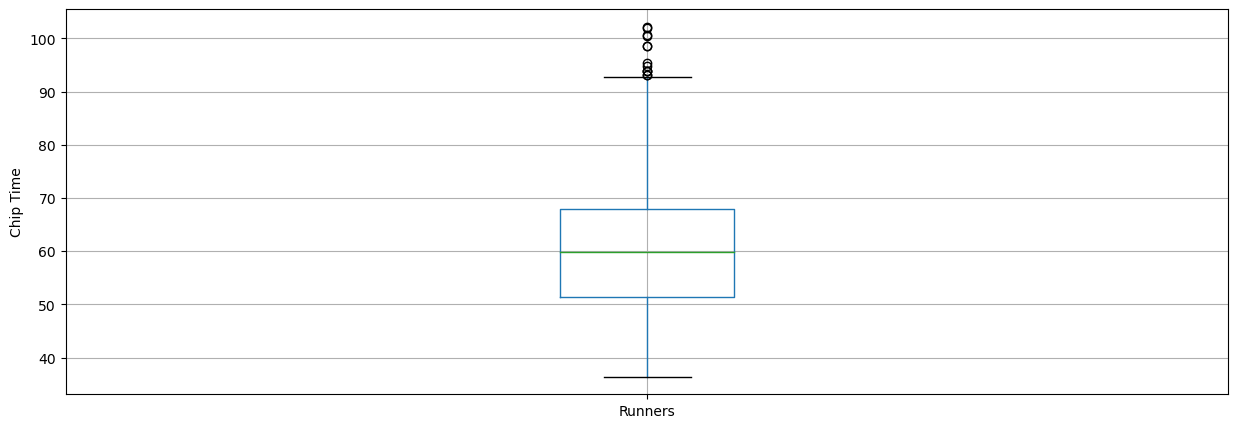

In [49]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

/var/folders/1d/4mwlswxn5799tmjgydtwltzh0000gn/T/ipykernel_23771/2333182940.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})


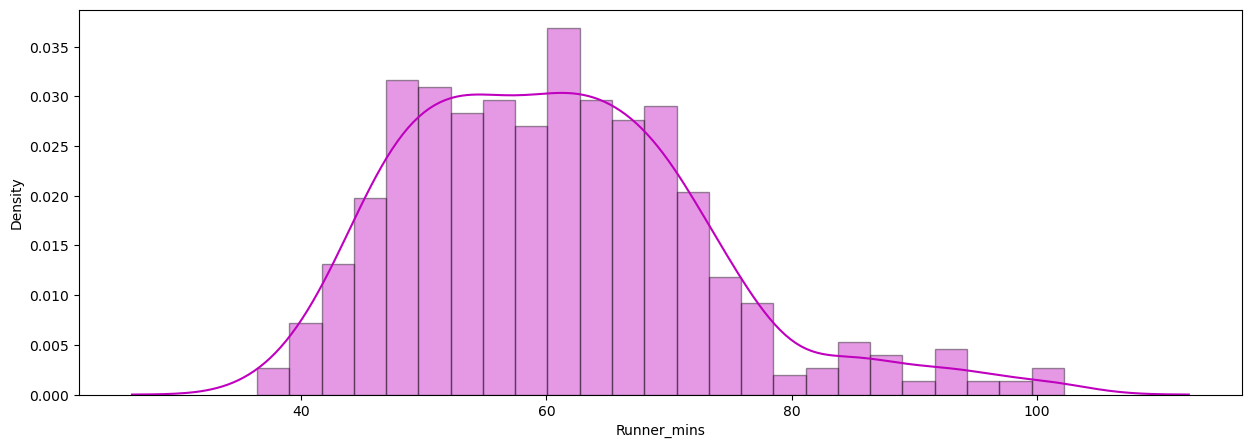

In [50]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

/var/folders/1d/4mwlswxn5799tmjgydtwltzh0000gn/T/ipykernel_23771/3347935440.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
/var/folders/1d/4mwlswxn5799tmjgydtwltzh0000gn/T/ipykernel_23771/3347935440.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

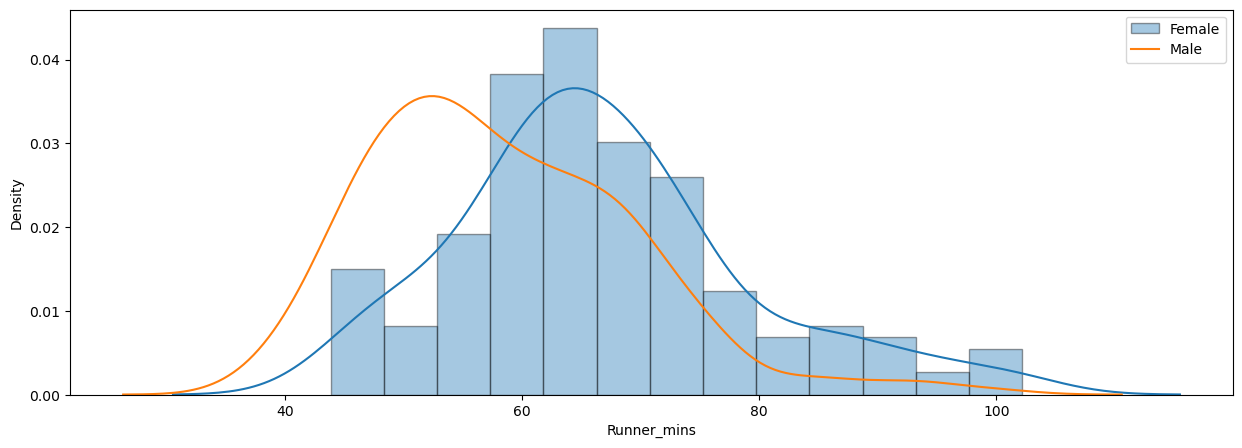

In [51]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()


In [52]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)


        Runner_mins                                                         \
              count       mean        std    min      25%     50%      75%   
 Gender                                                                      
 F            163.0  66.743313  12.287684  43.87  59.2850  65.200  72.3600   
 M            414.0  58.225314  11.170700  36.40  49.7875  56.475  65.4275   

                 
            max  
 Gender          
 F       102.17  
 M       100.53  


Text(0.5, 0.98, '')

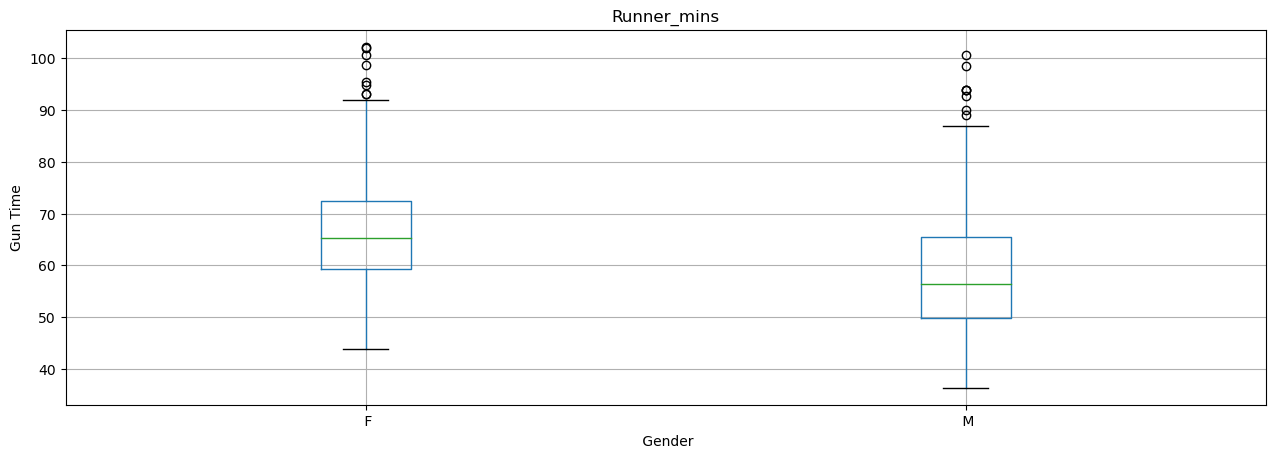

In [54]:
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Gun Time')
plt.suptitle("")


### 7. Conclusion:
The average chip time for all females and males was ~66 mins and ~58 mins, respectively. Above is a side-by-side boxplot comparison of male and female finish times.